In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [2]:
alpha = -0.97
beta = 1.05
rho = 0.0002

In [3]:
def F(P, E): # double well potential
    return (alpha*P**2)/2 + (beta*P**4)/4 + beta*P*E

def solFP(P,E): #dU/DP
    return alpha*P + beta*P**3 + beta*E

def findPAPC(E): #finding the equi points
    PA = sc.optimize.fsolve(solFP,2,args=(E))
    PB = sc.optimize.fsolve(solFP,-2,args=(E))
    PC = sc.optimize.fsolve(solFP,0,args=(E))
    return np.array([PA, PB, PC])

def findrk(Vpluse, D): #finding the double well hight
    E = Vpluse
    [PA,PB,PC] = findPAPC(E)
    F2derPA = alpha + 3*beta*PA**2
    F2derPC = alpha + 3*beta*PC**2
    deltaF = abs(F(PC,E) - F(PA,E))
    #kramers time
    rk = (abs(F2derPA*F2derPC))**0.5/(2*np.pi*rho)*np.exp(-deltaF/D)
    return rk

def finddU(Vpluse): #finding double well depth
    E = Vpluse
    PA,PB,PC = findPAPC(E)
    return abs(F(PC,E) - F(PA,E))

def TDGL(t, P, E, alpha, beta, rho):
    P_fit = [P[0]]
    dt = t[1] - t[0]
    for i in range(1,len(t)):
        df_dp = alpha*P_fit[i-1] + beta*P_fit[i-1]**3 + beta*E[i]
        P_fit.append(P_fit[i-1] - dt/rho*df_dp)
    return np.array(P_fit)*1

def sin_wave(M, frequency, dt):
    T = 1 / frequency  # Period of the wave
    t = np.arange(0, 4*T, dt)  # Time values
    # Generate triangular wave: 0 → +max → -max → 0
    y =  M*np.sin(2*np.pi*t*frequency)
    return t, y

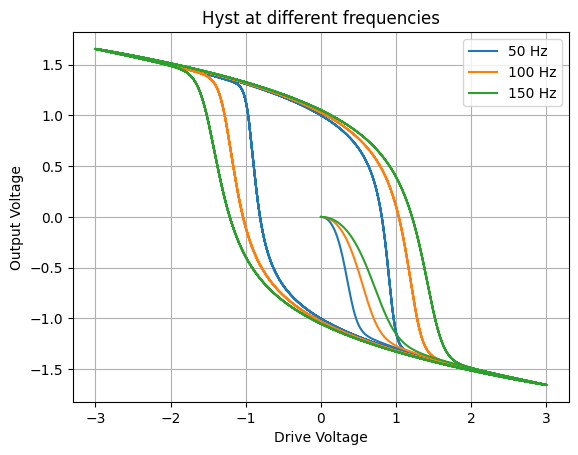

In [4]:
f = [50, 100, 150]
for fs in f:
    ts, Edrives = sin_wave(3, fs, 100e-9)
    P_fits = TDGL(ts, [0], Edrives, alpha, beta, rho)
    plt.plot(Edrives, P_fits, label = f"{fs} Hz")
plt.xlabel("Drive Voltage")
plt.ylabel("Output Voltage")
plt.title("Hyst at different frequencies")
plt.legend()
plt.grid()

delU at 0.1 =  [0.13184578]
delU at 0.075 =  [0.15321376]
delU at 0.05 =  [0.17571804]


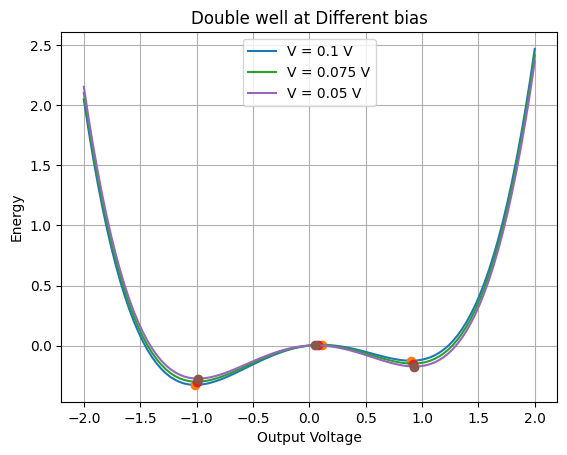

In [10]:
P = np.linspace(-2,2,100)
E = [0.1, 0.075, 0.05]
for Es in E:
    plt.plot(P,F(P,Es), label = f"V = {Es} V")
    plt.plot(findPAPC(Es), F(findPAPC(Es), Es), "o")
    print(f"delU at {Es} = ", finddU(Es))
plt.xlabel("Output Voltage")
plt.ylabel("Energy")
plt.title("Double well at Different bias")
plt.legend()
plt.grid()

In [6]:
#measurement results
Kt_100 = np.array([75804.66, 37081.47, 20765.69, 14783.99, 10114.07, 7905.03, 6380.39, 4976.49, 4125.87, 3542.3, 4235.16])
Kt_75 = np.array([121573.38, 57695.5, 30838.43, 17917.06, 13486.9, 9902.96, 7132.7, 5726.8, 4610.04, 3992.87, 4285.82])
Kt_50 =  np.array([225451.8, 92181.4, 41022.75, 24939.97, 16596.76, 11944.56, 8777.86, 7105.07, 5432.45, 4975.76, 5131.87])

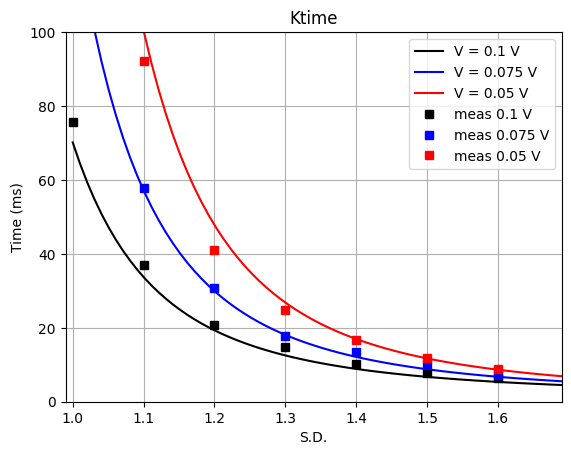

In [ ]:
sd = np.linspace(1,2,100)
sdm = np.linspace(1,2,11)
BW = 80e3
D = ((sd)**2)/(2*rho*BW)
cl = ["black", "blue", "red"]
for i, Es in enumerate(E):
    plt.plot(sd,(1/findrk(Es, D))*1e3, "-", c = cl[i], label = f"V = {Es} V")

plt.plot(sdm, Kt_100/1e3, "s", c="black", label = "meas 0.1 V")
plt.plot(sdm, Kt_75/1e3, "s", c="blue", label = "meas 0.075 V")
plt.plot(sdm, Kt_50/1e3, "s", c="red", label = "meas 0.05 V")

plt.xlim([0.99, 1.69])
plt.ylim([0, 100])

plt.xlabel("S.D.")
plt.ylabel("Time (ms)")
plt.title("Ktime")
plt.legend()
plt.grid()
# plt.savefig("Ktime_Surrogate_meas.pdf")

In [8]:
ts = [1,2,3,4,6,8,11,15,19,22,27,32,39,46,55,66,79,149,200]
P_075 = [0.0, 0.04, 0.07, 0.11, 0.15, 0.22, 0.33, 0.44, 0.53, 0.59, 0.65, 0.7, 0.75, 0.86, 0.89, 0.92, 0.96, 0.99, 0.98]
P_100 = [0.07, 0.11, 0.14, 0.24, 0.31, 0.42, 0.53, 0.64, 0.74, 0.77, 0.82, 0.89, 0.93, 0.95, 0.97, 0.99, 0.99, 0.99, 1]
P_050 = [0.01, 0.03, 0.06, 0.08, 0.12, 0.15, 0.22, 0.33, 0.37, 0.46, 0.51, 0.56, 0.67, 0.73, 0.76, 0.83, 0.88, 0.97, 0.98]

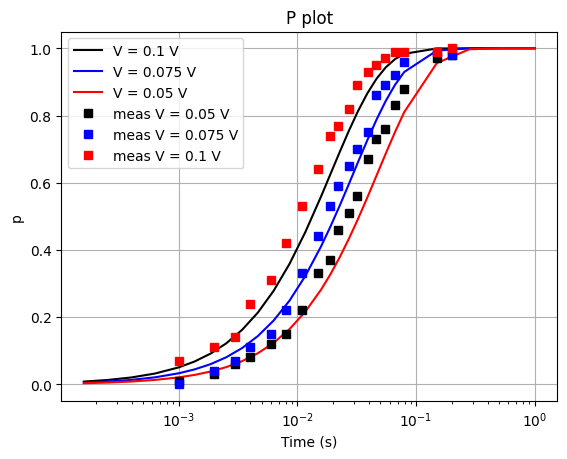

In [ ]:
tp1 = np.logspace(-3.8,-3,5)
tp2 = np.logspace(-3,-1.8,10)
tp3 = np.logspace(-1.8,-1.1,10)
tp4 = np.logspace(-1.1,0,5)
tp = np.concatenate((tp1, tp2, tp3, tp4))

sd = 1.2
D = ((sd)**2)/(2*rho*BW)
for i, Es in enumerate(E):
    plt.semilogx(tp, 1-np.exp(-tp*findrk(Es,D)), "-", c = cl[i],  label = f"V = {Es} V")

plt.semilogx(np.array(ts)*1e-3, P_050,"s", c = cl[0], label = f"meas V = 0.05 V")
plt.semilogx(np.array(ts)*1e-3, P_075,"s", c = cl[1], label = "meas V = 0.075 V")
plt.semilogx(np.array(ts)*1e-3, P_100,"s", c = cl[2], label = f"meas V = 0.1 V")

plt.ylabel("p")
plt.xlabel("Time (s)")
plt.title("P plot")
plt.legend()
plt.grid()
# plt.savefig("Pplot_Surrogate_meas.pdf")

In [10]:
print(tp[5:-1]*1000)


[  1.           1.35935639   1.8478498    2.51188643   3.41454887
   4.64158883   6.30957344   8.57695899  11.65914401  15.84893192
  15.84893192  18.95735652  22.67543126  27.12272579  32.44226079
  38.80510732  46.41588834  55.51935914  66.40827851  79.43282347
  79.43282347 149.62356561 281.83829313 530.88444423]


0.037812500000000006


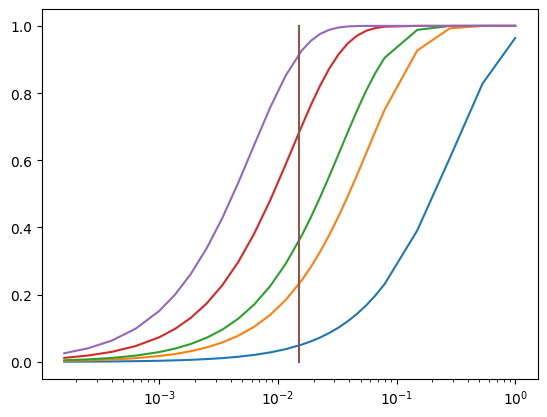

In [11]:
# choosing the operating point
# 50 Hz signal
# 1.2 sd noise 80khz bandlimited

sd = 1.1
D = ((sd)**2)/(2*rho*BW)
E = [0.005, 0.075, 0.1, 0.15, 0.2]
for Es in E:
    plt.semilogx(tp, 1-np.exp(-tp*findrk(Es,D)), label = f"V = {Es} V")

p = np.linspace(0,1,10)
plt.plot(0*p+15e-3,p)
print(D)

linerized around p = 0.5: P =  6.868621426633404 Vbias + -0.2400623335356853


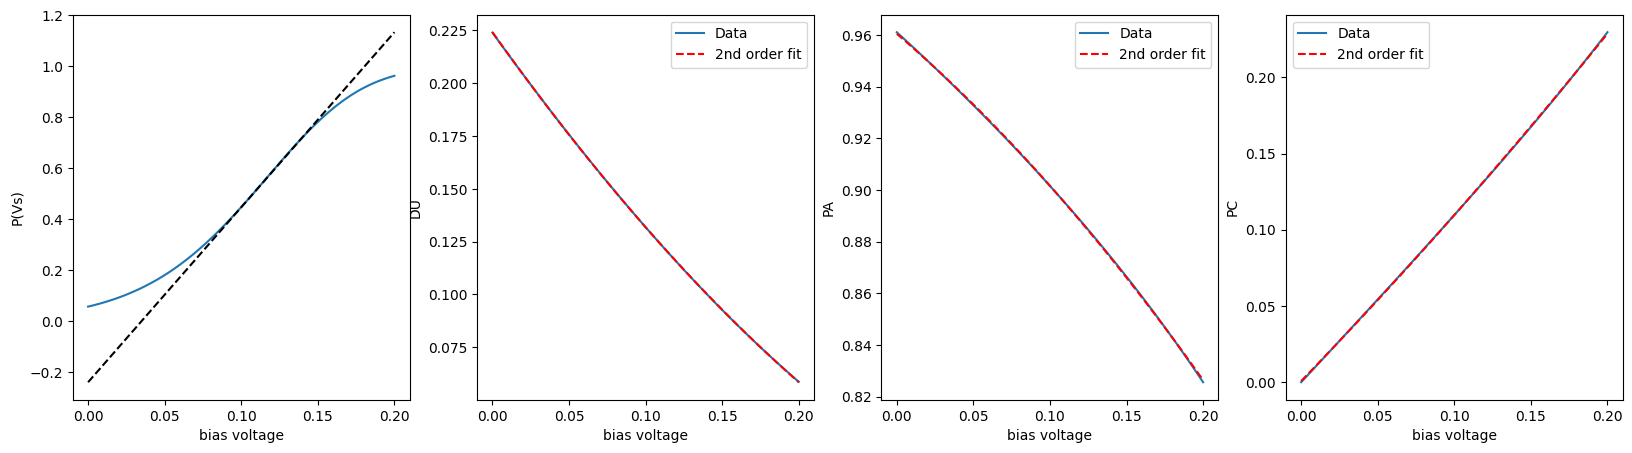

In [25]:
Vps = np.linspace(0, 0.2, 100)
tps = 20e-3
P1 = []
DU = []
PA = []
PC = []

for i in range(len(Vps)):
    rk1 = findrk(Vps[i], D)
    p1 = 1 - np.exp(-tps * rk1)
    P1.append(p1)
    du = finddU(Vps[i])
    pa, _, pc = findPAPC(Vps[i])
    DU.append(du)
    PA.append(pa)
    PC.append(pc)


# linear fit for P = 0.5
idx = np.where((np.array(P1) > 0.49) & (np.array(P1) <0.51))[0][0]
m = (P1[idx] - P1[idx-1])/(Vps[idx] - Vps[idx-1])
c = P1[idx-1] - Vps[idx-1]*m
line_equ = m*Vps + c
print("linerized around p = 0.5: P = ", m[0], "Vbias +", c[0])

# Fit 2nd order polynomial for DU, PA, and PC
coeffs_DU = np.polyfit(Vps, DU, 2)
coeffs_PA = np.polyfit(Vps, PA, 2)
coeffs_PC = np.polyfit(Vps, PC, 2)

fit_DU = np.polyval(coeffs_DU, Vps)
fit_PA = np.polyval(coeffs_PA, Vps)
fit_PC = np.polyval(coeffs_PC, Vps)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.plot(Vps, P1)
plt.plot(Vps,line_equ, "--", c = "black")
plt.xlabel("bias voltage")
plt.ylabel("P(Vs)")

plt.subplot(1, 4, 2)
plt.plot(Vps, DU, label="Data")
plt.plot(Vps, fit_DU, 'r--', label="2nd order fit")
plt.xlabel("bias voltage")
plt.ylabel("DU")
plt.legend()

plt.subplot(1, 4, 3)
plt.plot(Vps, PA, label="Data")
plt.plot(Vps, fit_PA, 'r--', label="2nd order fit")
plt.xlabel("bias voltage")
plt.ylabel("PA")
plt.legend()

plt.subplot(1, 4, 4)
plt.plot(Vps, PC, label="Data")
plt.plot(Vps, fit_PC, 'r--', label="2nd order fit")
plt.xlabel("bias voltage")
plt.ylabel("PC")
plt.legend()


In [13]:
print(coeffs_DU, coeffs_PA, coeffs_PC)

[[ 1.0240906 ]
 [-1.04008155]
 [ 0.22564473]] [[-1.1310323 ]
 [-0.41817761]
 [ 0.9546003 ]] [[0.86955841]
 [0.93508374]
 [0.0076209 ]]


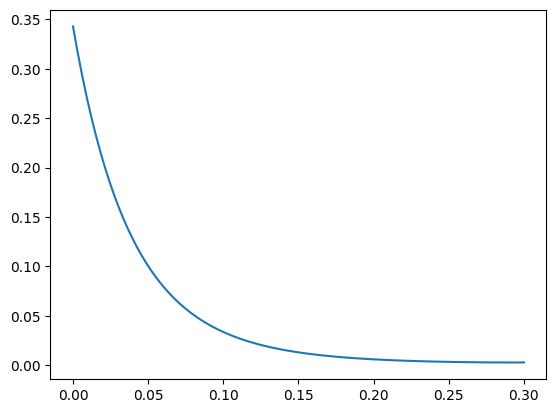

In [14]:
sd = 1.1
D = ((sd)**2)/(2*rho*BW)


Vbias = np.linspace(0,0.3,100)
tk1 = []
for i in range(len(Vbias)):
    tk1.append(1/findrk(Vbias[i], D))
plt.plot(Vbias, tk1)
